<h1><center>Assignment 8: FRUIT CLASSIFICATION REPORT (CNN)</center></h1>

# I. Introduction 

Apply Deep Learning CNN and utilize this dataset to predict kind of fruit as the given

# II. Data source

https://www.kaggle.com/moltean/fruits

# III. Data description

Total number of images: 82213.

Training set size: 61488 images (one fruit or vegetable per image).

Test set size: 20622 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 120 (fruits and vegetables).

Image size: 100x100 pixels.

# IV.  TRAINING

In [406]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

## 1. Define input data before training

In [482]:
# setting image size, batch size, number of classes
img_width, img_height = 100, 100
batch_size = 32
num_classes = 120

# getting directory of 'Training', 'Test', 'test-multiple_fruits' folders
train_data_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Training'
test_data_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Test'
multi_test_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/test-multiple_fruits'


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## 2. Define CNN model

#### Model structure: (CONV2D (relu) -> MAX POOLING) x 3 -> FULLY CONNECTED (hidden layer - 64 units -> final layer - 120 units -> softmax)  

In [408]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

#### Hyper parameter tuning, model compiling

In [409]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

## 3. Generate image inputs

In [483]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
#     ,shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

multi_test_datagen = ImageDataGenerator(rescale=1./255)

# generate inputs
## train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')

## test
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')

## multi_test
multi_test_generator = test_datagen.flow_from_directory(
    multi_test_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    class_mode= None,
    shuffle=False)

Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.
Found 106 images belonging to 1 classes.


## 4. Training model

#### epoch steps of train and test set

In [411]:
step_train_size = train_generator.n // train_generator.batch_size
step_test_size = test_generator.n // test_generator.batch_size

In [412]:
model.fit_generator(
    train_generator,
    steps_per_epoch= step_train_size ,
    epochs=8,
    validation_data=test_generator,
    validation_steps= step_test_size)

model.save_weights('final.h5') 

Epoch 1/8
1890/1890 [==============================] - 567s 300ms/step - loss: 0.5045 - accuracy: 0.8710 - val_loss: 0.1933 - val_accuracy: 0.8923
Epoch 2/8
1890/1890 [==============================] - 401s 212ms/step - loss: 0.0505 - accuracy: 0.9857 - val_loss: 0.5535 - val_accuracy: 0.8766
Epoch 3/8
1890/1890 [==============================] - 400s 212ms/step - loss: 0.0307 - accuracy: 0.9915 - val_loss: 0.4945 - val_accuracy: 0.9340
Epoch 4/8
1890/1890 [==============================] - 428s 226ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.2133 - val_accuracy: 0.9731
Epoch 5/8
1890/1890 [==============================] - 383s 203ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.2596 - val_accuracy: 0.9496
Epoch 6/8
1890/1890 [==============================] - 370s 196ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.1192 - val_accuracy: 0.9617
Epoch 7/8
1890/1890 [==============================] - 365s 193ms/step - loss: 3.3423e-04 - accuracy: 0.9999 - val_los

Epoch 1/8
1890/1890 [==============================] - 567s 300ms/step - loss: 0.5045 - accuracy: 0.8710 - val_loss: 0.1933 - val_accuracy: 0.8923
Epoch 2/8
1890/1890 [==============================] - 401s 212ms/step - loss: 0.0505 - accuracy: 0.9857 - val_loss: 0.5535 - val_accuracy: 0.8766
Epoch 3/8
1890/1890 [==============================] - 400s 212ms/step - loss: 0.0307 - accuracy: 0.9915 - val_loss: 0.4945 - val_accuracy: 0.9340
Epoch 4/8
1890/1890 [==============================] - 428s 226ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.2133 - val_accuracy: 0.9731
Epoch 5/8
1890/1890 [==============================] - 383s 203ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.2596 - val_accuracy: 0.9496
Epoch 6/8
1890/1890 [==============================] - 370s 196ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.1192 - val_accuracy: 0.9617
Epoch 7/8
1890/1890 [==============================] - 365s 193ms/step - loss: 3.3423e-04 - accuracy: 0.9999 - val_loss: 0.0214 - val_accuracy: 0.9750

Epoch 8/8
1890/1890 [==============================] - 349s 185ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0643 - val_accuracy: 0.9620


#### Weights of model

In [413]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6400)            

## 5. Evaluate model

In [486]:
# all 120 classes
class_names = list(train_generator.class_indices.keys())
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon

### 5.1 Evaluation on 'Test' set 

#### loss and accuracy (results above)

loss: 0.0208 - accuracy: 0.9947 

val_loss: 0.0643 - val_accuracy: 0.9620

#### f1-score, precision, recall

In [506]:
from sklearn.metrics import f1_score
f1_score(actual_test, predict_test_labels, average='macro')

0.008638870458744658

In [467]:
predict_test = model.predict_generator(test_generator)

predict_test_labels = np.argmax(predict_test, axis=1)
actual_test = test_generator.classes

In [479]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(actual_test, predict_test_labels, target_names=class_names)
print(report)

                     precision    recall  f1-score   support

     Apple Braeburn       0.01      0.01      0.01       164
 Apple Crimson Snow       0.00      0.00      0.00       148
     Apple Golden 1       0.01      0.01      0.01       164
     Apple Golden 2       0.02      0.02      0.02       164
     Apple Golden 3       0.01      0.02      0.01       161
 Apple Granny Smith       0.01      0.01      0.01       164
    Apple Pink Lady       0.01      0.01      0.01       152
        Apple Red 1       0.01      0.01      0.01       164
        Apple Red 2       0.02      0.02      0.02       164
        Apple Red 3       0.01      0.01      0.01       144
Apple Red Delicious       0.01      0.01      0.01       166
 Apple Red Yellow 1       0.01      0.01      0.01       164
 Apple Red Yellow 2       0.01      0.01      0.01       219
            Apricot       0.02      0.02      0.02       164
            Avocado       0.00      0.00      0.00       143
       Avocado ripe    

### 5.2 Evaluation on 'multi-test-sets' 

#### The multi-test-sets has 106 images

In [487]:
multi_test_generator.n

106

#### predict the class of the 'multi-test-sets' (106 images)

In [490]:
# calculate the probability of classes within the 'multi-test-sets'
predict_multi_test = model.predict_generator(multi_test_generator)

# predict the class based on highes probability
predict_labels = np.argmax(predict_multi_test, axis=1)

In [491]:
predict_labels

array([ 17,  62,  88,  17,  62,  17, 108,  86, 108,  17,  24,  24,  87,
        16,  86,  25,  25,  86,  86,  16,  25,  16,  24,  86,  86,  86,
        86,  86,  86,  25,  24,  83,  24,  90,  25,  86,  86,  86,  86,
        90,  16,  86,  25,  25,  83,  24,  17,  86,  52,  24,  16,  17,
        17,  24,  24,  64,  62,  25,  86,  16,  17,  24,  16,  16,  17,
        86,  24,  86,  86,  86,  86,  86,  16,  83,  88,  25,  25,  93,
        25,  25,  25,  25, 113, 105, 106, 100,  69, 109,  25,  25, 105,
       100,  86,  18,  18,  24,  24,  24, 109,  17,  88,  24,  86,  25,
        86,  86], dtype=int64)

#### Comparision between actual and predicted classes 

In [494]:
filename = multi_test_generator.filenames

fruit_multi_test_name = []
for name in filename:
    name=name.replace('test-multiple_fruits\\', '')
    name = name.replace('.jpg', '')
    fruit_multi_test_name.append(name)
    
for i in range(106):
    label = predict_labels[i]
    print(f'Actual: {fruit_multi_test_name[i]} \nPredicted: {class_names[label]}')
    print('=================================')

Actual: Bananas(lady_finger)1 
Predicted: Banana Lady Finger
Actual: Bananas(lady_finger)2 
Predicted: Maracuja
Actual: Bananas(lady_finger)3 
Predicted: Pepper Yellow
Actual: Bananas(lady_finger)4 
Predicted: Banana Lady Finger
Actual: Bananas(lady_finger)5 
Predicted: Maracuja
Actual: apple 
Predicted: Banana Lady Finger
Actual: apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum 
Predicted: Strawberry
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum 
Predicted: Pepper Green
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2 
Predicted: Strawberry
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3 
Predicted: Banana Lady Finger
Actual: apple_grape 
Predicted: Carambula
Actual: apple_grape2 
Predicted: Carambula
Actual: apple_pear 
Predicted: Pepper Red
Actual: apples1 
Predicted: Banana
Actual: apples2 
Predicted: Pepper Green
Actual: apples3 
Predicted: Cauliflower
Actual: apples4 
Predicted: Cauliflower
Actual: apples_peaches1 
Pre

#### displaying 10 random images in the 'multi-test-sets 

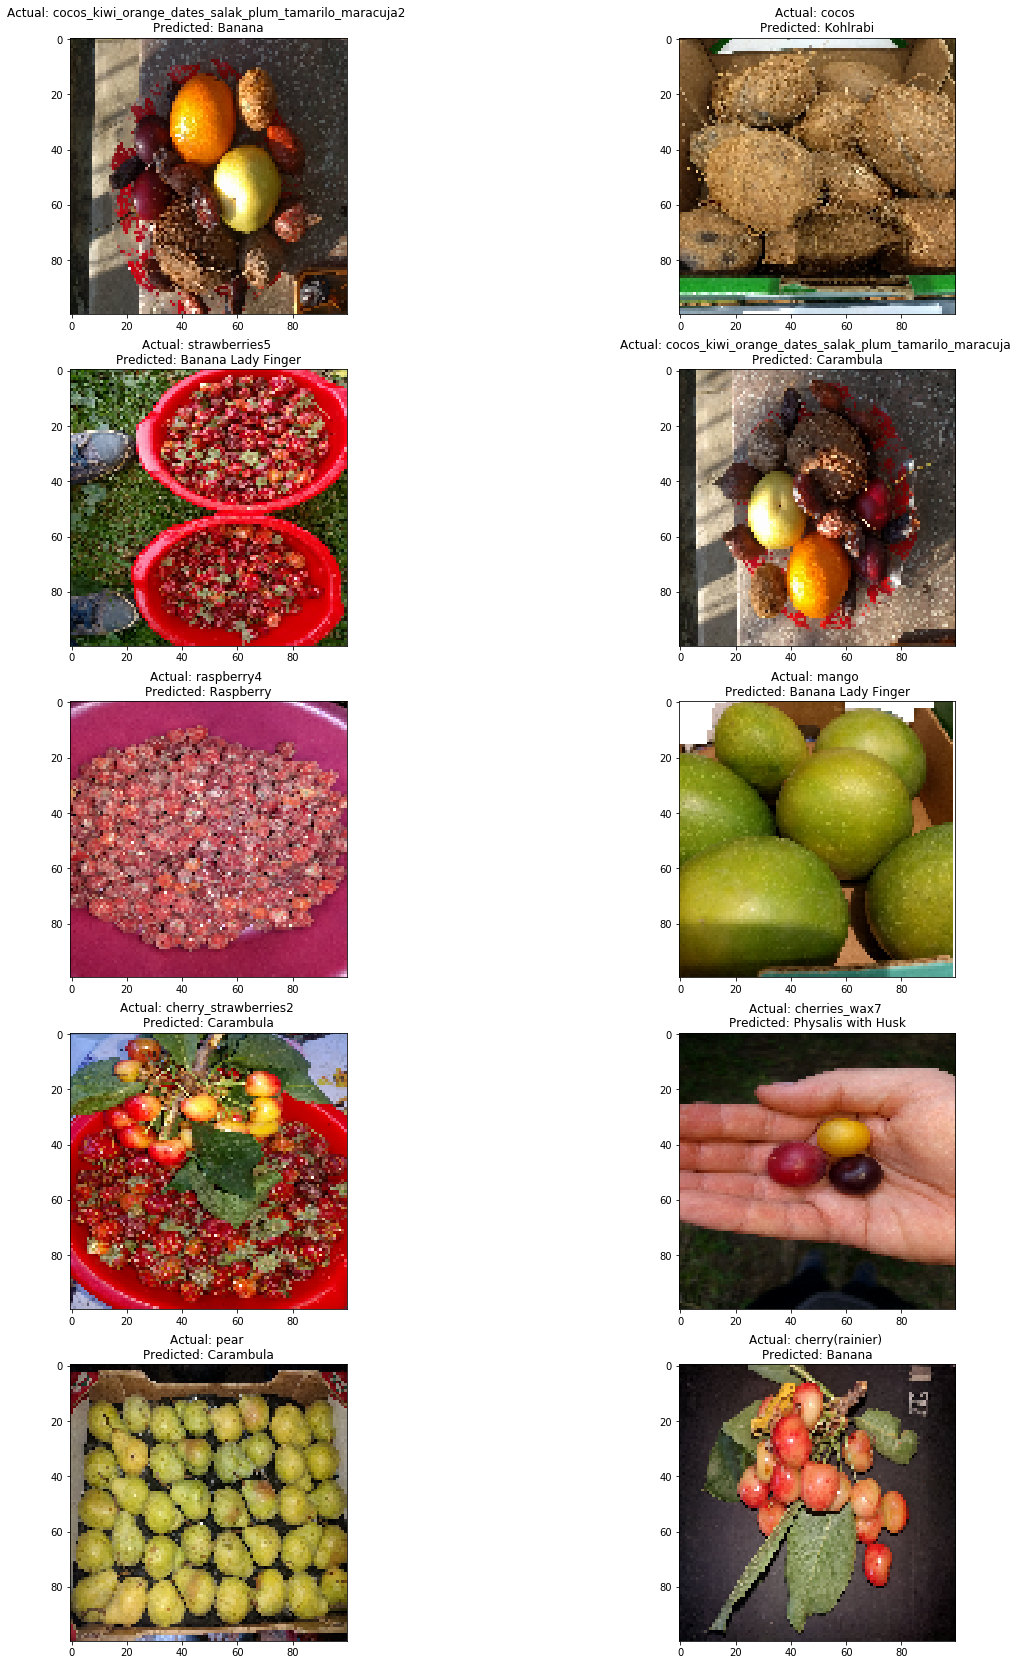

In [495]:
import random
# random.seed(42)
random_pick = random.sample(range(106), 10)

image = []

for i in random_pick:   
    img = load_img(multi_test_dir + '/' + filename[i], target_size=(100, 100))
    image.append(img)

plt.figure(figsize=(20, 60))

for i in range(10):
    label = predict_labels[random_pick[i]]
    plt.subplot(10, 2, i+1)
    plt.title(f'Actual: {fruit_multi_test_name[random_pick[i]]} \nPredicted: {class_names[label]}')
    plt.imshow(image[i])

=> the model does not predict well on the 'multi-test-sets' since there are to much noise regarding various colors and edges in the these images

# V. Conclusion

loss: 0.0208 - accuracy: 0.9947 

val_loss: 0.0643 - val_accuracy: 0.9620